In [349]:
# Useful imports
import pandas as pd
import numpy as np

In [5]:
# Load the dataset into notebook
dataset = pd.read_csv("twcs.csv")
dataset.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [15]:
# Shape of DataFrame
dataset.shape

(2811774, 7)

In [16]:
# Number of inbound and outbound tweets
dataset['inbound'].value_counts()

True     1537843
False    1273931
Name: inbound, dtype: int64

In [17]:
# Value type of each variable/column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811774 entries, 0 to 2811773
Data columns (total 7 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tweet_id                 int64  
 1   author_id                object 
 2   inbound                  bool   
 3   created_at               object 
 4   text                     object 
 5   response_tweet_id        object 
 6   in_response_to_tweet_id  float64
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 131.4+ MB


In [18]:
# Amount of empty values in each column
dataset.isnull().sum()

tweet_id                         0
author_id                        0
inbound                          0
created_at                       0
text                             0
response_tweet_id          1040629
in_response_to_tweet_id     794335
dtype: int64

In [604]:
# Sum of data points from 2008-2016
eight = dataset['created_at'].str.contains(r'2008').sum()
nine = dataset['created_at'].str.contains(r'2009').sum()
ten = dataset['created_at'].str.contains(r'2010').sum()
eleven = dataset['created_at'].str.contains(r'2011').sum()
twelve = dataset['created_at'].str.contains(r'2012').sum()
thirteen = dataset['created_at'].str.contains(r'2013').sum()
fourteen = dataset['created_at'].str.contains(r'2014').sum()
fifteen = dataset['created_at'].str.contains(r'2015').sum()
sixteen = dataset['created_at'].str.contains(r'2016').sum()
seventeen = dataset['created_at'].str.contains(r'2017').sum()

not17 = eight+nine+ten+eleven+twelve+thirteen+fourteen+fifteen+sixteen
print(before2017)

2300


In [164]:
# Drop everything before 2017, as they are outliers
df = dataset[~(dataset['created_at'] < '2017-01-02')]
# if i want to make df in order after droping values,
# i need to convert it to a datetime val then organize, then back to obj


In [607]:
# ENTER PIE CHART HERE

yearly = pd.DataFrame({'Year': ['Before 2017','2017'], 'Count':[not17, seventeen],index = ['Year','Count']})
yearly.plot.pie(subplots=True,figsize=(11, 5))

SyntaxError: invalid syntax (1028652510.py, line 3)

In [581]:
# Top authors by response
df['in_response_to_tweet_id'].value_counts()

625011.0     844
776192.0     560
37012.0      297
5965.0       185
87814.0      174
            ... 
1058186.0      1
1058185.0      1
1058183.0      1
1058181.0      1
2987950.0      1
Name: in_response_to_tweet_id, Length: 1774822, dtype: int64

In [143]:
# Top twitter users by number of tweets
tu = df['author_id'].value_counts()
tu

AmazonHelp      169840
AppleSupport    106860
Uber_Support     56270
SpotifyCares     43265
Delta            42253
                 ...  
746201               1
745624               1
552214               1
745567               1
263067               1
Name: author_id, Length: 702777, dtype: int64

In [167]:
# New dataframe to analyze author_id and dates
ac = pd.DataFrame({'author_id': df['author_id'], 
                  'created_at':df['created_at']})


,author_id,created_at
0,sprintcare,Tue Oct 31 22:10:47 +0000 2017
1,115712,Tue Oct 31 22:11:45 +0000 2017
2,115712,Tue Oct 31 22:08:27 +0000 2017
3,sprintcare,Tue Oct 31 21:54:49 +0000 2017
4,115712,Tue Oct 31 21:49:35 +0000 2017
...,...,...
2811769,sprintcare,Wed Nov 22 08:43:51 +0000 2017
2811770,823869,Wed Nov 22 08:35:16 +0000 2017
2811771,121673,Thu Nov 23 04:13:07 +0000 2017
2811772,AldiUK,Wed Nov 22 08:31:24 +0000 2017


In [512]:
Amzn = ac['author_id'].str.contains(pat='AmazonHelp').value_counts(sort=True)[True]
Appl = ac['author_id'].str.contains(pat='AppleSupport').value_counts(sort=True)[True]
Uber = ac['author_id'].str.contains(pat='Uber_Support').value_counts(sort=True)[True]
Spotify = ac['author_id'].str.contains(pat='SpotifyCares').value_counts(sort=True)[True]
Delta = ac['author_id'].str.contains(pat='Delta').value_counts(sort=True)[True]

top_users = pd.DataFrame([('AmazonHelp', Amzn),("AppleSupport", Appl),
('Uber_Support', Uber),('SpotifyCares', Spotify),('Delta', Delta)],
columns=('Company', '# of Entries'))
top_users

,Company,# of Entries
0,AmazonHelp,169840
1,AppleSupport,106860
2,Uber_Support,56270
3,SpotifyCares,43265
4,Delta,42253


# Top 5 Users

<AxesSubplot:title={'center':'Top Users by Number of Tweets'}, xlabel='Company', ylabel='# of Tweets'>

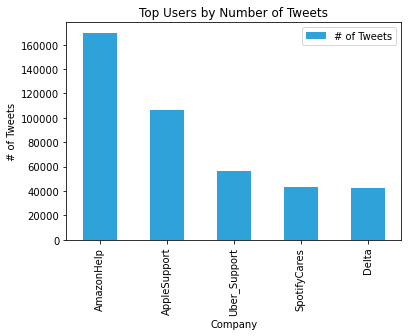

In [651]:
top_5_users = pd.DataFrame([('AmazonHelp', Amzn),("AppleSupport", Appl),
('Uber_Support', Uber),('SpotifyCares', Spotify),('Delta', Delta)],
columns=('Company', '# of Tweets'))
top_5_users.plot.bar(title='Top Users by Number of Tweets',x='Company', ylabel='# of Tweets', color=(0.18823529411764706, 0.63529411764705879, 0.85490196078431369))

# Analysis of Monthly Traffic

In [152]:
# Sum up twitter count for each month
Jan = ac['created_at'].str.contains(r'Jan').sum()
Feb = ac['created_at'].str.contains(r'Feb').sum()
Mar = ac['created_at'].str.contains(r'Mar').sum()
Apr = ac['created_at'].str.contains(r'Apr').sum()
May = ac['created_at'].str.contains(r'May').sum()
Jun = ac['created_at'].str.contains(r'Jun').sum()
Jul = ac['created_at'].str.contains(r'Jul').sum()
Aug = ac['created_at'].str.contains(r'Aug').sum()
Sep = ac['created_at'].str.contains(r'Sep').sum()
Oct = ac['created_at'].str.contains(r"Oct").sum()
Nov = ac['created_at'].str.contains(r'Nov').sum()
Dec = ac['created_at'].str.contains(r'Dec').sum()

## Twitter Count from January to September

<AxesSubplot:title={'center':'Monthly Traffic: January - Septempber'}, xlabel='Month', ylabel='# of Tweets'>

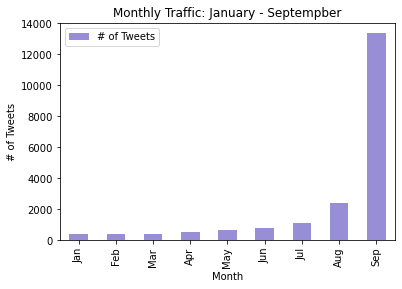

In [473]:
month_freq_jan_sep = pd.DataFrame([('Jan', Jan),('Feb', Feb),
('Mar', Mar),('Apr', Apr),('May', May),('Jun', Jun),('Jul', Jul),
('Aug', Aug),('Sep', Sep),],
columns=('Month', '# of Tweets'))
px.bar(month_freq_jan_sep,x='Month',y='# of Tweets')                                                                                                                                                                                    
month_freq_jan_sep.plot.bar(title='Monthly Traffic: January - Septempber',x='Month', ylabel='# of Tweets', color=(0.59607843137254901, 0.55686274509803924, 0.83529411764705885))

## Twitter Count From October to December

<AxesSubplot:title={'center':'Monthly Traffic: October - December'}, xlabel='Month', ylabel='# of Tweets in Millions'>

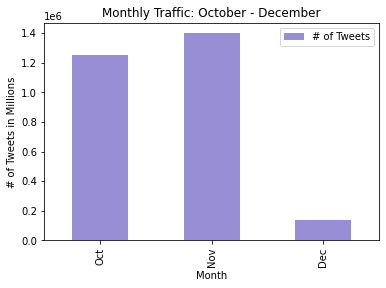

In [480]:
month_freq_oct_dec = pd.DataFrame([('Oct', Oct),('Nov', Nov),('Dec', Dec)],
columns=('Month', '# of Tweets'))
month_freq_oct_dec.plot.bar(title='Monthly Traffic: October - December',x='Month', ylabel='# of Tweets in Millions', color=(0.59607843137254901, 0.55686274509803924, 0.83529411764705885))

In [79]:
df['inbound'].value_counts()

True     1537843
False    1273931
Name: inbound, dtype: int64

# Analysis of Weekly Traffic

## Weekly Traffic: All Users

In [385]:
# New dataframe with days & # of tweets by extracting first 3 letters
ac['Day of the Wk'] = ac['created_at'].str[:3]
general_inital_DOW = pd.DataFrame({'# of Tweets':ac['Day of the Wk'].value_counts()})
general_inital_DOW

,# of Tweets
Fri,453028
Wed,445838
Thu,440361
Tue,423052
Mon,387847
Sat,332606
Sun,329042


In [364]:
# Organize dataframe so wk starts on Monday
general_inital_DOW = general_inital_DOW.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
general_inital_DOW

,# of Tweets
Mon,387847
Tue,423052
Wed,445838
Thu,440361
Fri,453028
Sat,332606
Sun,329042


In [365]:
# New dataframe where days are a variable and not an index 
general_final_DOW = general_inital_DOW.reset_index(level=0)
general_final_DOW = general_final_DOW.rename(columns={'index':'Day'})
general_final_DOW

,Day,# of Tweets
0,Mon,387847
1,Tue,423052
2,Wed,445838
3,Thu,440361
4,Fri,453028
5,Sat,332606
6,Sun,329042


<AxesSubplot:title={'center':'Weekly Traffic for All Users'}, xlabel='Day'>

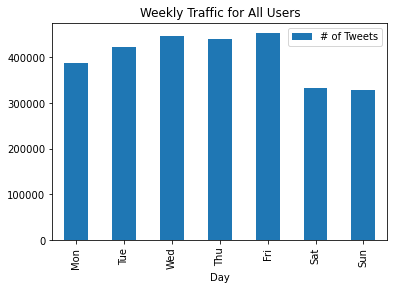

In [391]:
# Weekly traffic per day for all users
general_final_DOW.plot.bar(title='Weekly Traffic for All Users', x='Day', y='# of Tweets')

In [539]:
# New dataframe that contains all users to be used to compare to others
all_compare = pd.DataFrame({'All Users':ac['Day of the Wk'].value_counts()})
all_compare = all_compare.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
all_compare_final = all_compare.reset_index(level=0)
all_compare_final = all_compare_final.rename(columns={'index':'Day'})
all_compare_final

,Day,All Users
0,Mon,387847
1,Tue,423052
2,Wed,445838
3,Thu,440361
4,Fri,453028
5,Sat,332606
6,Sun,329042


## Weekly Traffic: Amazon_Support

In [353]:
# New dataframe for weekly traffic for Amazon
amazon = ac[ac['author_id'].str.contains(pat='AmazonHelp')]
amazon['Day of the Wk'] = amazon['created_at'].str[:3]
amzn_initial_DOW = pd.DataFrame({'# of Tweets':amazon['Day of the Wk'].value_counts()})
amzn_initial_DOW = amzn_initial_DOW.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
amzn_initial_DOW

,# of Tweets
Mon,21935
Tue,25428
Wed,26858
Thu,26504
Fri,27612
Sat,21822
Sun,19681


In [354]:
amzn_final_DOW = amzn_initial_DOW.reset_index(level=0)
amzn_final_DOW = amzn_final_DOW.rename(columns={'index':'Day'})
amzn_final_DOW

,Day,# of Tweets
0,Mon,21935
1,Tue,25428
2,Wed,26858
3,Thu,26504
4,Fri,27612
5,Sat,21822
6,Sun,19681


<AxesSubplot:title={'center':'@AmazonHelp Weekly Traffic'}, xlabel='Day', ylabel='# of Tweets'>

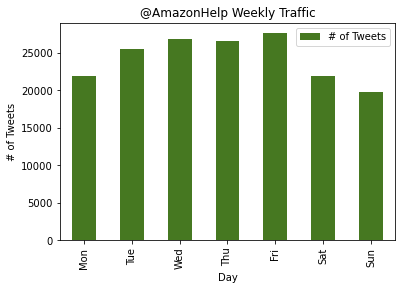

In [389]:
# Amazon weekly traffic
amzn_final_DOW.plot.bar(title='@AmazonHelp Weekly Traffic',x='Day', ylabel='# of Tweets', color=(0.27450980392156865, 0.47058823529411764, 0.12941176470588237))


In [555]:
# New dataset for Amazon to be used to compare to other users
amzn_compare = ac[ac['author_id'].str.contains(pat='AmazonHelp')]
amzn_compare['Day of the Wk'] = amzn_compare['created_at'].str[:3]
amzn_compare_inital = pd.DataFrame({'AmazonHelp':amazon['Day of the Wk'].value_counts()})
amzn_compare_inital = amzn_compare_inital.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
amzn_compare_final = amzn_compare_inital.reset_index(level=0)
amzn_compare_final = amzn_compare_final.rename(columns={'index':'Day'})

## Weekly Traffic: AppleSupport

In [316]:
# New dataframe for weekly traffic for AppleSupport
apple = ac[ac['author_id'].str.contains(pat='AppleSupport')]
apple['Day of the Wk'] = apple['created_at'].str[:3]
appl_initial_DOW = pd.DataFrame({'# of Tweets':apple['Day of the Wk'].value_counts()})
appl_initial_DOW = appl_initial_DOW.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
appl_initial_DOW

,# of Tweets
Mon,15486
Tue,16155
Wed,16831
Thu,15178
Fri,14395
Sat,14068
Sun,14747


In [317]:
appl_final_DOW = appl_initial_DOW.reset_index(level=0)
appl_final_DOW = appl_final_DOW.rename(columns={'index':'Day'})
appl_final_DOW

,Day,# of Tweets
0,Mon,15486
1,Tue,16155
2,Wed,16831
3,Thu,15178
4,Fri,14395
5,Sat,14068
6,Sun,14747


<AxesSubplot:title={'center':'@AppleSupport Weekly Traffic'}, xlabel='Day', ylabel='# of Tweets'>

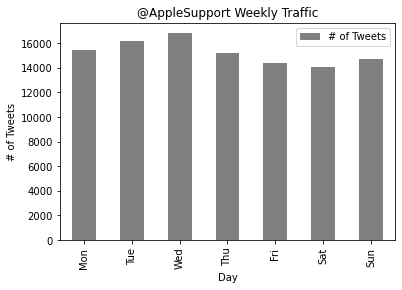

In [335]:
# AppleSupport weekly traffic
appl_final_DOW = appl_final_DOW.rename(columns={'index':'Day'})
appl_final_DOW.plot.bar(title = '@AppleSupport Weekly Traffic',x='Day', ylabel='# of Tweets',color = (0.50196078431372548, 0.50196078431372548, 0.50196078431372548))

In [446]:
# New dataset for AppleSupport to be used to compare to other users
appl_compare = ac[ac['author_id'].str.contains(pat='AppleSupport')]
appl_compare['Day of the Wk'] = appl_compare['created_at'].str[:3]
appl_compare_inital = pd.DataFrame({'AppleSupport':apple['Day of the Wk'].value_counts()})
appl_compare_inital = appl_compare_inital.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
apple_compare_final = appl_compare_inital.reset_index(level=0)
apple_compare_final = apple_compare_final.rename(columns={'index':'Day'})

## Weekly Traffic: Uber_Support

In [319]:
# New dataframe for weekly traffic for Uber_Support account
uber = ac[ac['author_id'].str.contains(pat='Uber_Support')]
uber['Day of the Wk'] = uber['created_at'].str[:3]
uber_initial_DOW = pd.DataFrame({'# of Tweets':uber['Day of the Wk'].value_counts()})
uber_initial_DOW = uber_initial_DOW.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
uber_initial_DOW

,# of Tweets
Mon,7412
Tue,8039
Wed,8068
Thu,8718
Fri,8991
Sat,7350
Sun,7692


In [320]:
uber_final_DOW = uber_initial_DOW.reset_index(level=0)
uber_final_DOW = uber_final_DOW.rename(columns={'index':'Day'})
uber_final_DOW

,Day,# of Tweets
0,Mon,7412
1,Tue,8039
2,Wed,8068
3,Thu,8718
4,Fri,8991
5,Sat,7350
6,Sun,7692


<AxesSubplot:title={'center':'@Uber_Support Weekly Traffic'}, xlabel='Day', ylabel='# of Tweets'>

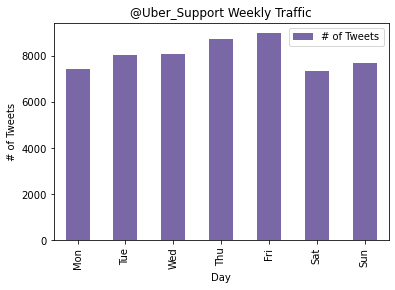

In [336]:
# Uber_Support weekly traffic
uber_final_DOW = uber_final_DOW.rename(columns={'index':'Day'})
uber_final_DOW.plot.bar(title='@Uber_Support Weekly Traffic',x='Day', ylabel='# of Tweets', color = (0.47843137254901963, 0.40784313725490196, 0.65098039215686276))

In [449]:
# New dataset for Uber_Support to be used to compare to other users
uber_compare = ac[ac['author_id'].str.contains(pat='Uber_Support')]
uber_compare['Day of the Wk'] = uber_compare['created_at'].str[:3]
uber_compare_inital = pd.DataFrame({'Uber_Support':uber['Day of the Wk'].value_counts()})
uber_compare_inital = uber_compare_inital.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
uber_compare_final = uber_compare_inital.reset_index(level=0)
uber_compare_final = uber_compare_final.rename(columns={'index':'Day'})

,Day,Uber_Support
0,Mon,7412
1,Tue,8039
2,Wed,8068
3,Thu,8718
4,Fri,8991
5,Sat,7350
6,Sun,7692


# Comparing Weekly Traffic of Top Users to Each Other

## Weekly Analysis: AmazonHelp & AppleSupport

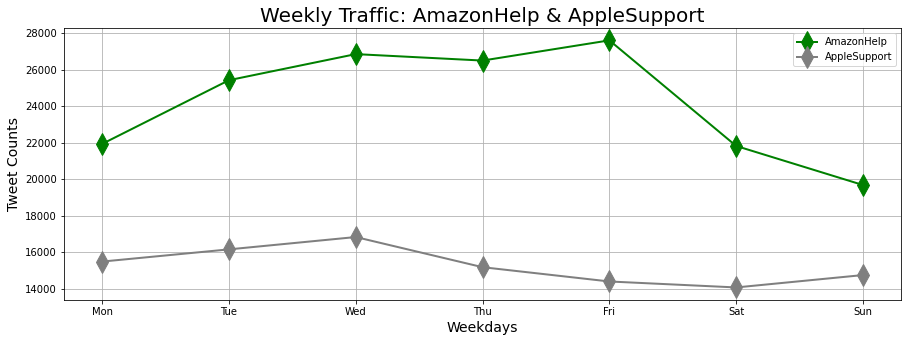

In [576]:
fig = plt.figure(figsize = (15, 5))

plt.plot(amzn_compare_final['Day'], amzn_compare_final['AmazonHelp'], color='green', marker='d',linewidth=2, markersize=15, label='AmazonHelp')
plt.plot(apple_compare_final['Day'], apple_compare_final['AppleSupport'], color='tab:gray', marker='d',linewidth=2, markersize=15, label='AppleSupport')

plt.title('Weekly Traffic: AmazonHelp & AppleSupport', fontsize=20)
plt.xlabel('Weekdays', fontsize=14)
plt.ylabel('Tweet Counts', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

## Weekly Analysis: AmazonHelp & Uber_Support

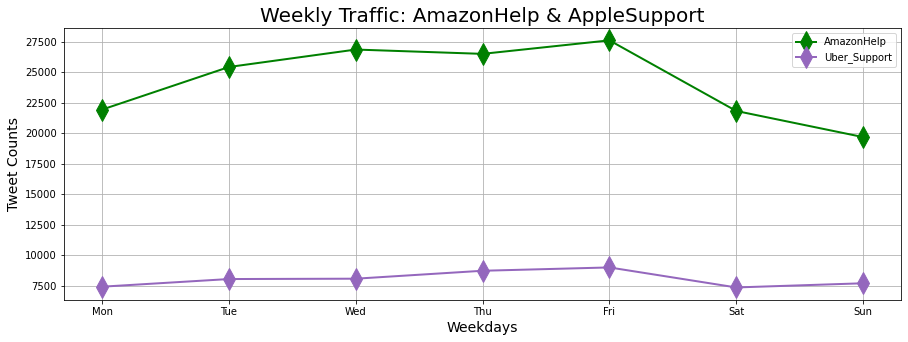

In [577]:
fig = plt.figure(figsize = (15, 5))

plt.plot(amzn_compare_final['Day'], amzn_compare_final['AmazonHelp'], color='green', marker='d',linewidth=2, markersize=15, label='AmazonHelp')
plt.plot(uber_compare_final['Day'], uber_compare_final['Uber_Support'], color='tab:purple', marker='d',linewidth=2, markersize=15, label='Uber_Support')

plt.title('Weekly Traffic: AmazonHelp & AppleSupport', fontsize=20)
plt.xlabel('Weekdays', fontsize=14)
plt.ylabel('Tweet Counts', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

## Weekly Analysis: AppleSupport & Uber_Support

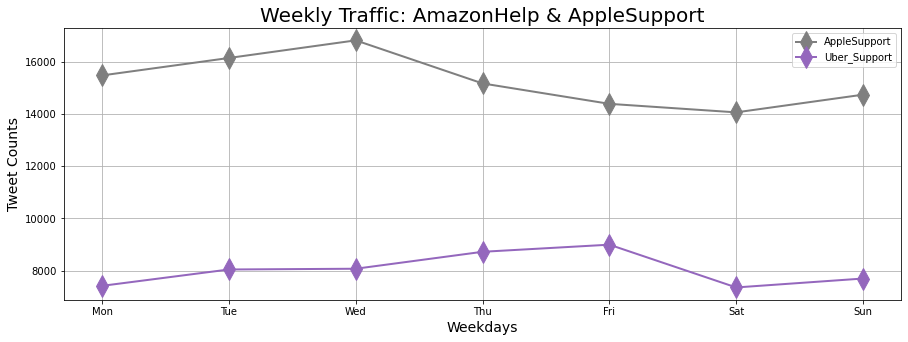

In [578]:
fig = plt.figure(figsize = (15, 5))

plt.plot(apple_compare_final['Day'], apple_compare_final['AppleSupport'], color='tab:gray', marker='d',linewidth=2, markersize=15, label='AppleSupport')
plt.plot(uber_compare_final['Day'], uber_compare_final['Uber_Support'], color='tab:purple', marker='d',linewidth=2, markersize=15, label='Uber_Support')

plt.title('Weekly Traffic: AmazonHelp & AppleSupport', fontsize=20)
plt.xlabel('Weekdays', fontsize=14)
plt.ylabel('Tweet Counts', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

## Weekly Analysis: AmazonHelp & AppleSupport & Uber_Support

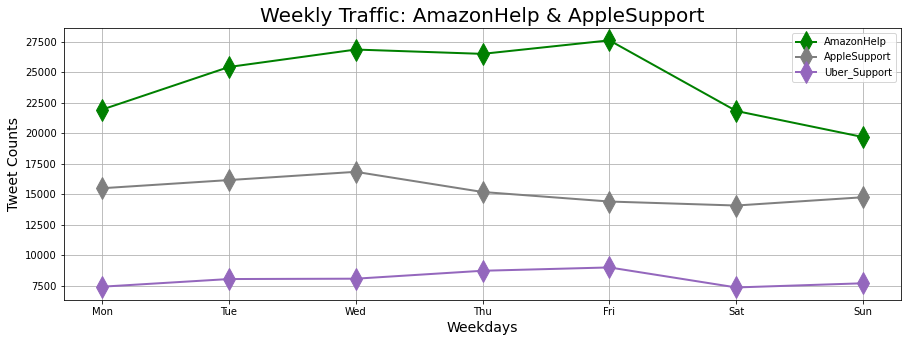

In [579]:
fig = plt.figure(figsize = (15, 5))

plt.plot(amzn_compare_final['Day'], amzn_compare_final['AmazonHelp'], color='green', marker='d',linewidth=2, markersize=15, label='AmazonHelp')
plt.plot(apple_compare_final['Day'], apple_compare_final['AppleSupport'], color='tab:gray', marker='d',linewidth=2, markersize=15, label='AppleSupport')
plt.plot(uber_compare_final['Day'], uber_compare_final['Uber_Support'], color='tab:purple', marker='d',linewidth=2, markersize=15, label='Uber_Support')

plt.title('Weekly Traffic: AmazonHelp & AppleSupport', fontsize=20)
plt.xlabel('Weekdays', fontsize=14)
plt.ylabel('Tweet Counts', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

# Comparing Weekly Traffic of Top Users to All Users

## Weekly Traffic: AmazonHelp & All Users

array([<AxesSubplot:xlabel='Day'>, <AxesSubplot:xlabel='Day'>],
      dtype=object)

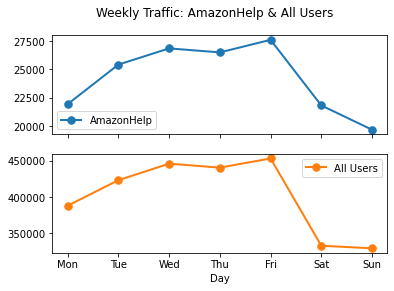

In [670]:
amzn_all.plot(title='Weekly Traffic: AmazonHelp & All Users', x='Day',marker='.',linewidth=2, markersize=15,subplots=True)

## Weekly Traffic: AppleSupport & All Users

array([<AxesSubplot:xlabel='Day'>, <AxesSubplot:xlabel='Day'>],
      dtype=object)

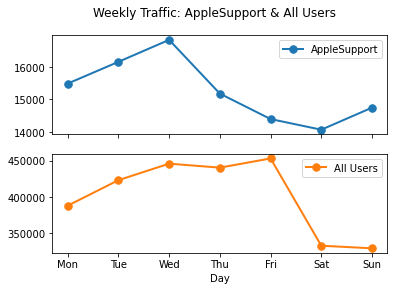

In [671]:
apple_all = pd.merge(apple_compare_final,all_compare_final)                                                                                                                                
apple_all.plot(title='Weekly Traffic: AppleSupport & All Users', x='Day',marker='.',linewidth=2, markersize=15,subplots=True)

## Weekly Traffic: Uber_Support & All Users

array([<AxesSubplot:xlabel='Day'>, <AxesSubplot:xlabel='Day'>],
      dtype=object)

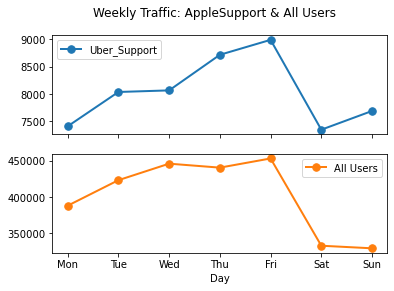

In [672]:
uber_all = pd.merge(uber_compare_final,all_compare_final)                                                                                                                                
uber_all.plot(title='Weekly Traffic: AppleSupport & All Users', x='Day',marker='.',linewidth=2, markersize=15,subplots=True)

In [122]:
# Organize by date
df['created_at'] = pd.to_datetime(df['created_at'])
df.sort_values(by='created_at', ascending = True,inplace=True)
df['created_at']

706552    2008-05-08 20:13:59+00:00
706551    2008-05-08 21:04:16+00:00
1604529   2010-02-16 15:49:47+00:00
2129896   2010-03-31 15:24:29+00:00
2129894   2010-03-31 16:53:27+00:00
                     ...           
537559    2017-12-03 23:12:50+00:00
537388    2017-12-03 23:13:00+00:00
531793    2017-12-03 23:13:00+00:00
533916    2017-12-03 23:13:02+00:00
524147    2017-12-03 23:14:01+00:00
Name: created_at, Length: 2811774, dtype: datetime64[ns, UTC]

In [174]:
# I am trying to isolate any datat that contains Amazon so do a focused analysis
amazon_data = df['author_id'].str.contains(r'AmazonHelp')

0    False
1    False
2    False
3    False
4    False
Name: author_id, dtype: bool

In [121]:
# Sort by tweets by 
df['created_at'] = pd.to_datetime(dataset['created_at'])
df.sort_values(by='created_at', ascending = True,inplace=True)
df['created_at']

706552    2008-05-08 20:13:59+00:00
706551    2008-05-08 21:04:16+00:00
1604529   2010-02-16 15:49:47+00:00
2129896   2010-03-31 15:24:29+00:00
2129894   2010-03-31 16:53:27+00:00
                     ...           
537559    2017-12-03 23:12:50+00:00
537388    2017-12-03 23:13:00+00:00
531793    2017-12-03 23:13:00+00:00
533916    2017-12-03 23:13:02+00:00
524147    2017-12-03 23:14:01+00:00
Name: created_at, Length: 2811774, dtype: datetime64[ns, UTC]